## EDA

Set up

In [4]:
import pandas as pd 
import sqlalchemy
import missingno as msn 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

Data CSV

In [5]:
df = pd.read_csv('../Data/df.csv')
#DROP COLUMNS
df = df.drop(columns=['adjustSquareMeterPrice', 'automaticACMPrice', 'created_at', 'terraceValue',
                       'utilityRoomValue', 'preofferAcmHigherValue','preofferAcmLowerValue','buildingFloors','estateFloors',
                       'rentValue','garageType','terraceArea','zone','garageValue', 'type'])

In [6]:
df.shape

(18911, 12)

Missing plot

<AxesSubplot:>

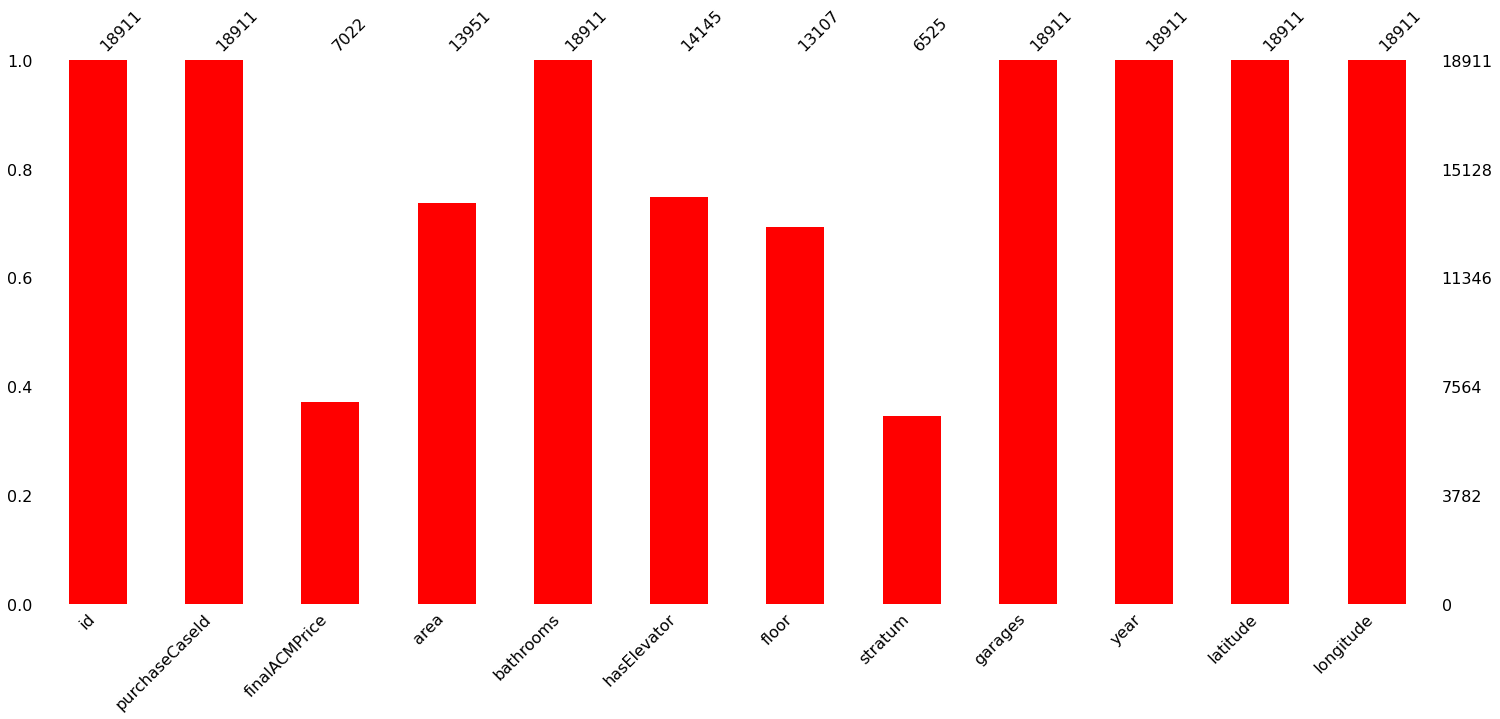

In [7]:
msn.bar(df, color = 'red')

Preprocesamiento de la información.

In [8]:
def preprocesamiento(df):
    #Drop rows with null values in Y variable
    df = df[df.finalACMPrice.notna()]
    #Calculate Antiguedad of a property in years
    df['Antiguedad'] = date.today().year - df['year']
    df['Antiguedad'] = df['Antiguedad'].astype(int)
    df = df.drop(columns=['id', 'purchaseCaseId', 'year'])
    #delete rows with null values in stratum variables
    df = df[df.stratum.notna()]
    #Turn floor to integer
    df = df[df.floor.notna()]
    df['floor'] = df['floor'].astype(int)
    #df = df[df.stratum.notna()]
    # Convert hasElevator to categorical
    df['hasElevator'] = df['hasElevator'].astype('category')
    return df

df = preprocesamiento(df)

C:\Users\User\AppData\Local\Temp\ipykernel_20972\1233199684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = date.today().year - df['year']
C:\Users\User\AppData\Local\Temp\ipykernel_20972\1233199684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = df['Antiguedad'].astype(int)


Plots describing some variables

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


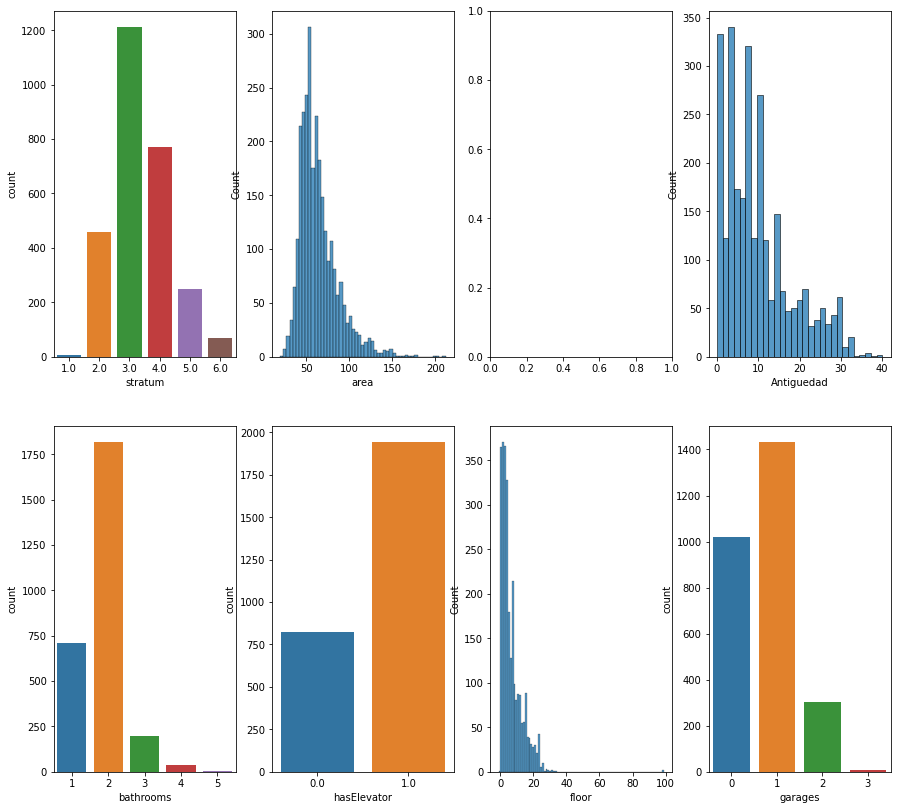



Response variable Y: 'finalACMPrice'


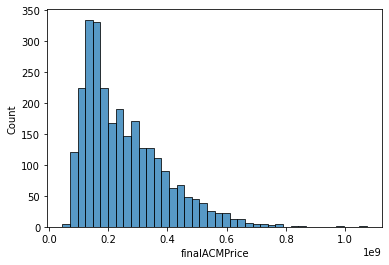

count    2.763000e+03
mean     2.550255e+08
std      1.371016e+08
min      4.528172e+07
25%      1.484662e+08
50%      2.213979e+08
75%      3.332263e+08
max      1.073428e+09
Name: finalACMPrice, dtype: float64




In [9]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(15, 14)

sns.countplot(x='stratum', data=df, ax=axs[0, 0])
sns.histplot(x='area', data=df, ax=axs[0, 1])
sns.histplot(x='Antiguedad', data=df, ax=axs[0, 3])
sns.countplot(x='bathrooms', data=df, ax=axs[1, 0])
sns.countplot(x='hasElevator', data=df,  ax=axs[1, 1])
sns.histplot(x='floor', data=df,  ax=axs[1, 2])
sns.countplot(x='garages', data=df, ax=axs[1, 3])

plt.show()
print('\n')


print("Response variable Y: 'finalACMPrice'")
sns.histplot(x='finalACMPrice', data=df)
plt.show()
print(df.finalACMPrice.describe())
print('\n')


In [10]:
df.dtypes

finalACMPrice     float64
area              float64
bathrooms           int64
hasElevator      category
floor               int32
stratum           float64
garages             int64
latitude          float64
longitude         float64
Antiguedad          int32
dtype: object

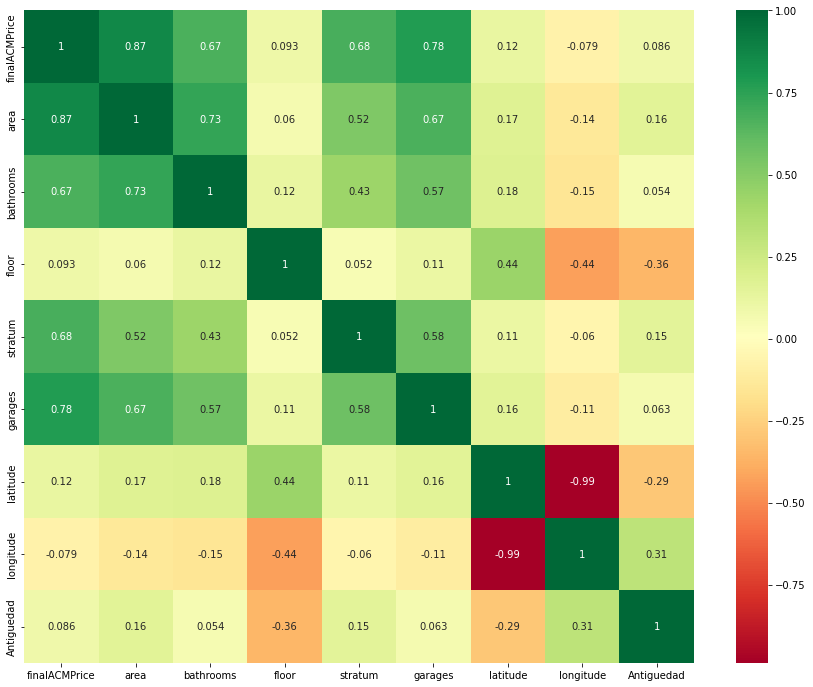

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [12]:
X = df.drop(columns=['finalACMPrice'])
y = df['finalACMPrice']

In [13]:
X.sample(10)

,area,bathrooms,hasElevator,floor,stratum,garages,latitude,longitude,Antiguedad
2951,72.0,2,0.0,4,3.0,1,4.722719,-74.126325,15
6868,88.0,2,1.0,18,3.0,1,6.226365,-75.561745,4
2873,49.0,2,0.0,1,3.0,0,4.717336,-74.130342,9
18877,69.0,2,1.0,5,4.0,1,4.732910,-74.054480,24
2717,45.0,1,0.0,2,3.0,0,6.152749,-75.393442,3
3336,44.0,1,0.0,1,2.0,1,4.643417,-74.195370,11
3285,59.0,2,1.0,4,3.0,0,4.694517,-74.088987,8
18661,37.0,1,1.0,19,3.0,0,6.260192,-75.571010,11
3258,67.0,2,1.0,6,4.0,1,4.661588,-74.116684,11
9312,56.0,2,0.0,1,3.0,0,4.609820,-74.226837,5
